In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [26]:
#Gender Column

In [3]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [3]:
df['gender']=df['gender'].replace('Other','Male')

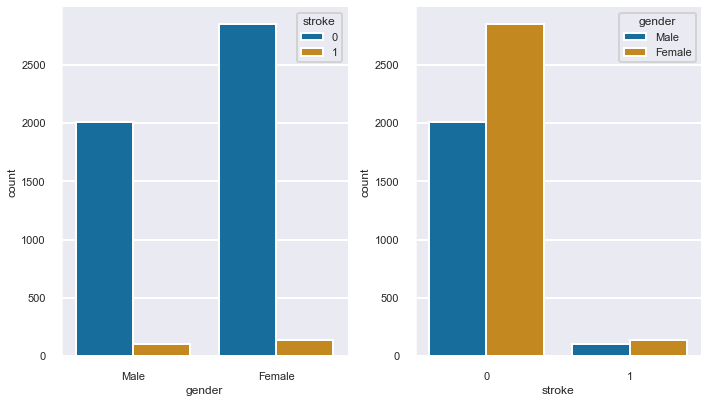

In [5]:
fig = plt.figure(figsize=(10,8))
gs = fig.add_gridspec(3,4)
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='gender', hue='stroke', data=df, ax=ax_gender_stroke, palette='colorblind')
sns.despine()

ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
sns.countplot(x='stroke', hue='gender', data=df, ax=ax_gender_stroke, palette='colorblind')
sns.despine()
plt.tight_layout()
plt.show()

In [59]:
#Classification Based On Work Type And Stroke

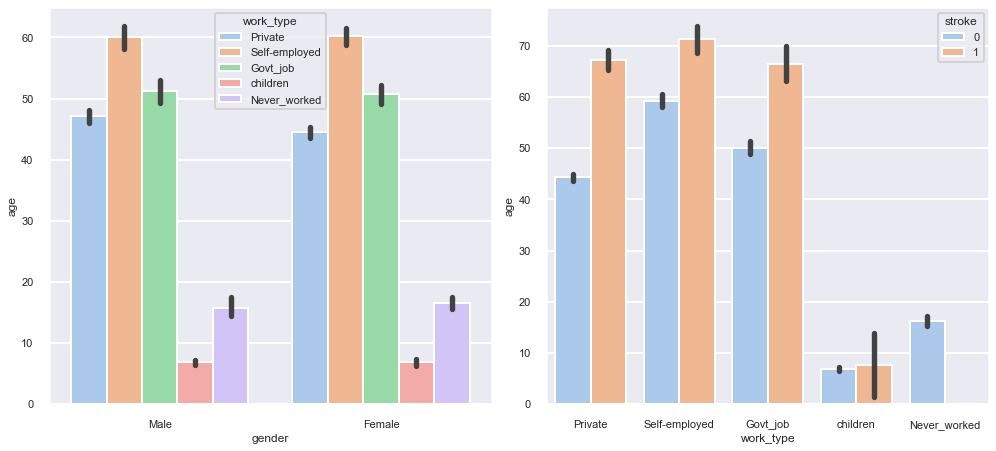

In [6]:
fig = plt.figure(figsize=(14,9))
gs = fig.add_gridspec(3,4)
sns.set_style("darkgrid")
sns.set_palette('pastel')
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.barplot(x='gender',y='age',ax=ax_gender_stroke,data=df,hue='work_type')
ax_gender_stroke = fig.add_subplot(gs[:2,2:4])
sns.barplot(x='work_type',y='age',ax=ax_gender_stroke,data=df,hue='stroke')
plt.tight_layout()
plt.show()

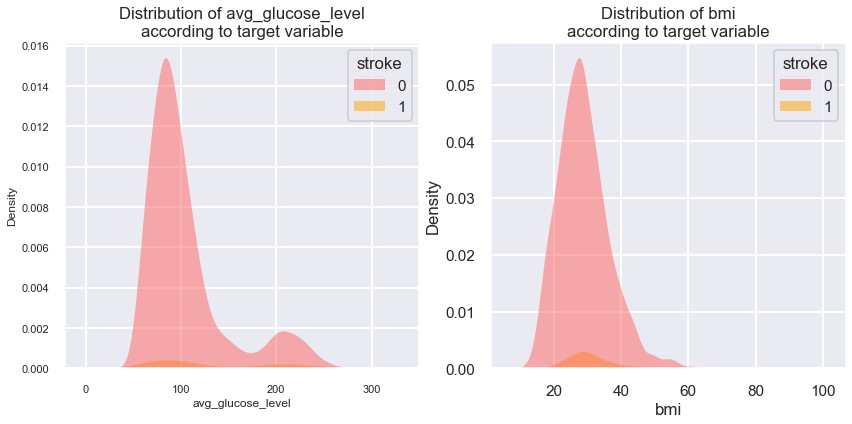

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.set_context("poster", font_scale = 0.7)
sns.set_style("darkgrid")
sns.kdeplot(x='avg_glucose_level',hue='stroke',data=df,fill=True, palette=["#ff6361","#ffa600"], alpha=.5, linewidth=0)
plt.title('Distribution of avg_glucose_level\naccording to target variable')
sns.set_context("poster", font_scale = 0.7)
sns.set_style("darkgrid")
plt.subplot(122)
sns.kdeplot(x='bmi',hue='stroke',data=df,fill=True,palette=["#ff6361","#ffa600"], alpha=.5, linewidth=0) 
plt.title('Distribution of bmi\naccording to target variable')
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

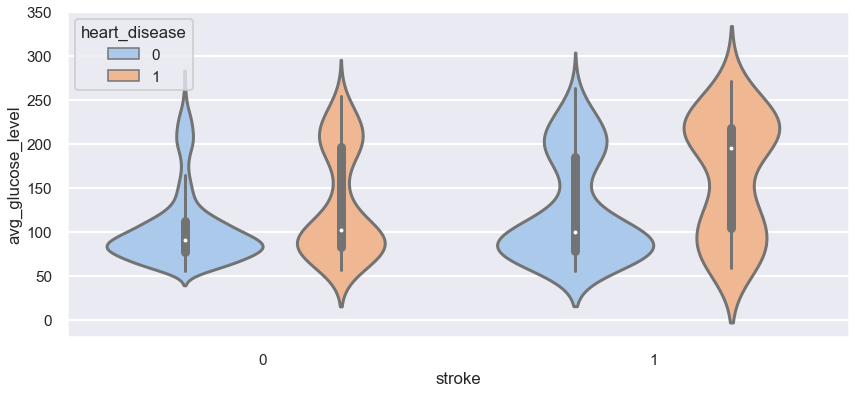

In [103]:
plt.figure(figsize=(14,6))
sns.violinplot(x='stroke',y='avg_glucose_level',data=df,hue='heart_disease')

<Figure size 2160x3600 with 0 Axes>

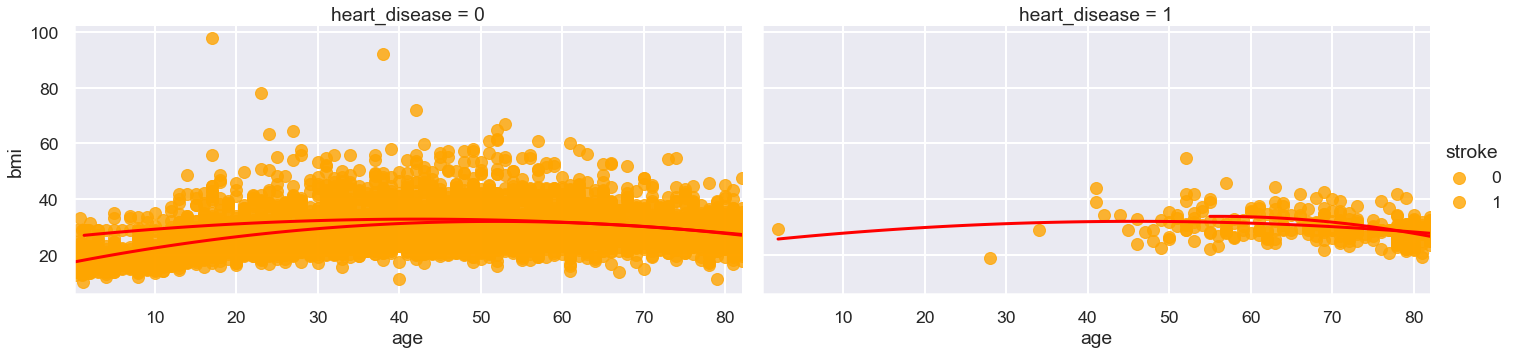

In [99]:
plt.figure(figsize=(30,50))
sns.set_context("poster", font_scale = .80)

sns.lmplot(x="age", y="bmi",hue='stroke',col='heart_disease',data=df,markers="o",
           order=2, ci=None, scatter_kws={"color": "orange"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);

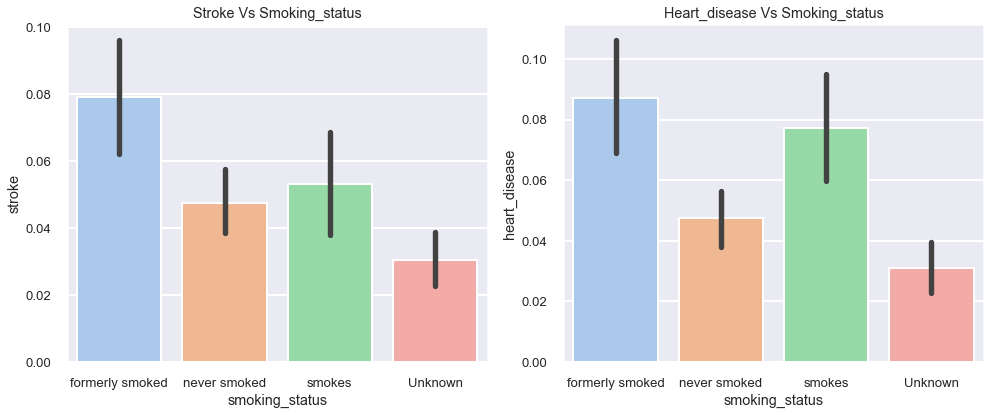

In [98]:
plt.figure(figsize=(14,6))
sns.set_context("poster", font_scale = .60)
plt.subplot(121)
sns.barplot(x='smoking_status',y='stroke',data=df)
plt.title('Stroke Vs Smoking_status')
plt.subplot(122)
sns.barplot(x='smoking_status',y='heart_disease',data=df)
plt.title('Heart_disease Vs Smoking_status')
plt.tight_layout()

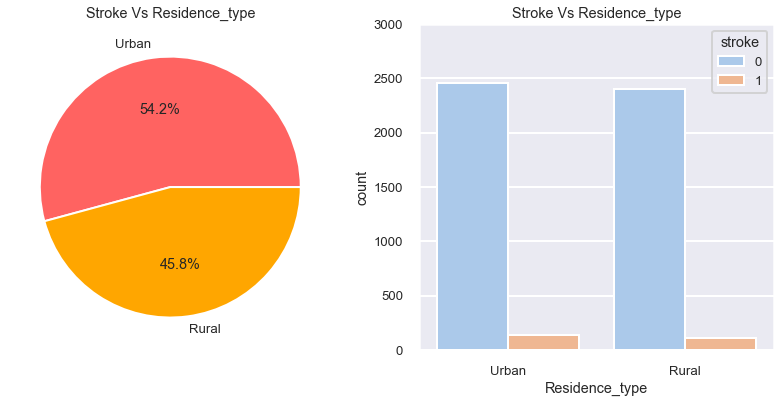

In [100]:
plt.figure(figsize=(14,6))
sns.set_context("poster", font_scale = .60)
plt.subplot(121)
label = ['Urban','Rural']
plt.pie(df[df['stroke']==1]['Residence_type'].value_counts(),labels= label ,autopct= "%1.1f%%",colors=['#ff6361','#ffa600'])
plt.title('Stroke Vs Residence_type')
plt.subplot(122)
b=sns.countplot(x='Residence_type',hue='stroke',data=df)
b.set_ylim([0,3000])
plt.title('Stroke Vs Residence_type')
plt.show()

<AxesSubplot:>

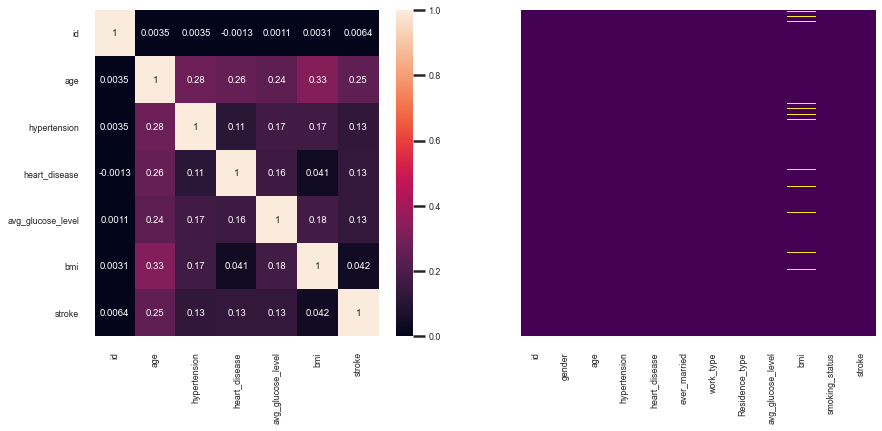

In [24]:
plt.figure(figsize=(14,6))
sns.set_context("poster", font_scale = .40)
plt.subplot(121)
sns.set_style('whitegrid')
sns.set_palette('pastel')
sns.heatmap(df.corr(),annot=True)
plt.subplot(122)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#Replace Bmi Missing Values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [4]:
#Model Building To Prdict Whether Has Stroke OR Not 

In [5]:
#Fix married,Male,Residance columns 
df['Male']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["Married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [6]:
df = pd.get_dummies(df, columns=['smoking_status'],drop_first=True)

In [7]:
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [8]:
df.drop(['id','gender','Residence_type','ever_married'],axis=1,inplace=True)

In [121]:
df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Male,Residence,Married,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,1,1,1,0,0
1,61.0,0,0,1,202.21,28.893237,1,0,0,1,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,1,0,1,0
3,49.0,0,0,0,171.23,34.400000,1,0,1,1,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,0,0,1,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing  import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [1]:
#Model Training 

In [1]:
#Random Forest

In [19]:
X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(accuracy_score(y_test,rfc_pred)*100)
k=accuracy_score(y_test,rfc_pred)*100
print('\n')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

94.32485322896281


[[1446    0]
 [  87    0]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.00      0.00      0.00        87

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.92      1533



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#KNN ALGORITHM


scale= StandardScaler()
scale.fit(df.drop('stroke',axis=1))
scaled_features = scale.transform(df.drop('stroke',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
X = df_feat
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
knn = KNeighborsClassifier(n_neighbors=1)
pred = knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('KNN Accuracy score is: ',accuracy_score(y_test,pred)*100)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN Accuracy score is:  91.32420091324201


[[1387   59]
 [  74   13]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1446
           1       0.18      0.15      0.16        87

    accuracy                           0.91      1533
   macro avg       0.56      0.55      0.56      1533
weighted avg       0.91      0.91      0.91      1533



Text(0, 0.5, 'Error Rate')

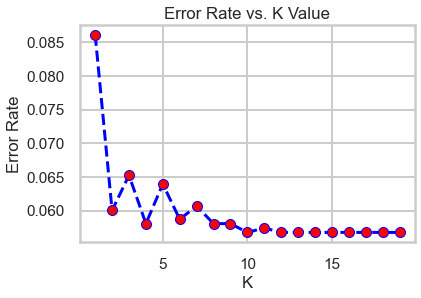

In [12]:
#Choose KNN Value
sns.set_context("poster", font_scale = 0.7)
sns.set_style("darkgrid")
error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

sns.set_style('whitegrid')
plt.plot(range(1,20),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
#Hence we see here that at k=4 is best 

In [15]:
knn = KNeighborsClassifier(n_neighbors=4)
pred = knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#print('LogisticRegression score is: ',np.round(model.score(y_test,pred)*100,decimals=2))
print('\n')
print('Best KNN Accuracy score is: ',accuracy_score(y_test,pred)*100)
print('\n')
m=accuracy_score(y_test,pred)*100

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



Best KNN Accuracy score is:  94.19439008480104


[[1443    3]
 [  86    1]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       0.25      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.90      0.94      0.92      1533



In [16]:
X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print('\n')
print('Logistics Accuracy score is: ',accuracy_score(y_test,predictions)*100)
p=accuracy_score(y_test,predictions)*100

print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))



Logistics Accuracy score is:  94.3900848010437


[[1446    0]
 [  86    1]]


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1446
           1       1.00      0.01      0.02        87

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


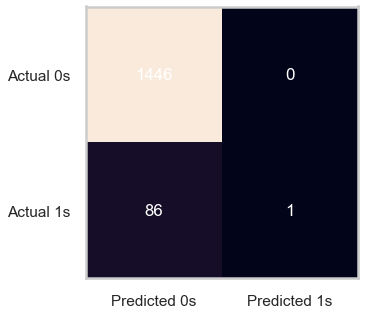

In [17]:
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(6, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [20]:
#Comparison

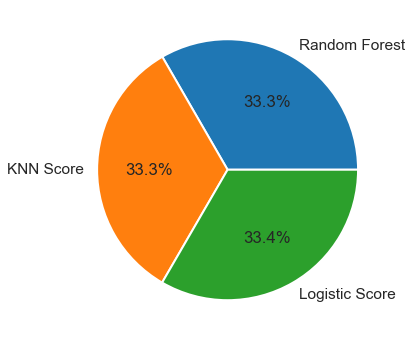

In [18]:
f = []
f.append(k)
f.append(m)
f.append(p)
plt.figure(figsize=(12,6))
label = 'Random Forest','KNN Score','Logistic Score'
plt.pie(f,labels=label,autopct= "%1.1f%%")
plt.show()